In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%%capture
# set up path to include parent directory
import sys
sys.path.append('../')

# Import everything from the data_utils library
from data_utils import *

# Load the talk data
talk_data = get_only_talks(load_data())

In [3]:
# Import libraries and setup matplotlib defaults
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
pl.style.use('bmh')
prop_cycle = pl.cycler(color=['#377eb8','#e41a1c','#4daf4a','#984ea3',
                              '#ff7f00','#ffff33','#a65628','#f781bf','#999999'])
pl.rcParams.update({
    'axes.prop_cycle': prop_cycle,
    'lines.linewidth': 2,
    'font.size': 20,
    'figure.figsize': [12, 8],
    'figure.subplot.left': 0.125,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.15})

In 2020 I gave a Sunstone presentation regarding trends in uses of words and phrases over time in general conference (much of the analysis is summarized [here](https://qhspencer.github.io/lds-data-analysis/changes/)). Since then, one of the more frequent questions I've been asked is regarding mentions of heavenly mother. The idea of heavenly mother is one that has been part of Mormonism from the early days, yet little talked about. The concept was introduced by Joseph Smith in one of his late sermons, but is not mentioned in any canonized scripture. The most well-known reference to heavenly mother, perhaps the primary reason for the concept persisting into the 21st century, is in the third verse of the hymn "O My Father", which ends with the phrase "truth eternal tells me I’ve a mother there", written by 19th century Relief Society leader (and plural wife of Joseph Smith) Eliza R. Snow.

In an effort to find all possible references to heavenly mother in general conference, I searched initially for "heavenly mother", "mother in heaven", and "heavenly parents". I also looked at references to Eliza R. Snow, of which there are over 60 in total, but most of them are other quotations from her (she is one of the more quoted women in general conference). There are a few occasions that specifically quote the end of that 3rd verse of "O My Father", which I will consider a heavenly mother reference. There is a reference to "heavenly father and mother", as well as a reference to "Eternal Feminine", which turns out to be in the context of Spencer W. Kimball quoting Goethe. There is a single reference to "divine feminine", but it is in the context of telling the female audience of their "divine feminine inner beauty", and thus not a heavenly mother reference, but another exercize in female pedestalization (so the speaker will remain nameless here).

The table below shows the total number of each of these types of heavenly mother references:

In [4]:
terms = {
    'heavenly mother': 'heavenly mother',
    'mother in heaven': 'mother in heaven',
    'eternal eeminine': 'eternal feminine',
    '"I'+rsqm+'ve a mother there"': 'a mother there',
    'heavenly father and mother': 'heavenly father and mother',
    'heavenly parents': 'heavenly parents'}

years = talk_data['year'].dt.year
results = pd.DataFrame(columns=['total uses', 'first year', 'last year'])
for label, search_string in terms.items():
    search_results = talk_data['body'].str.lower().str.count(search_string)
    results.loc[label] = [
        search_results.sum(),
        years[search_results>0].min(),
        years[search_results>0].max()]

results

,total uses,first year,last year
heavenly mother,4,1978,1987
mother in heaven,16,1948,2017
eternal eeminine,1,1978,1978
"""I’ve a mother there""",5,1970,1991
heavenly father and mother,1,1951,1951
heavenly parents,121,1945,2021


For the rest of this analysis, I will put these 6 different references into two broad categories. The first four are references to heavenly mother alone, and the last two are collective references to heavenly parents. The following table groups those references together:

In [5]:
terms_agg = {
    'heavenly mother references':
    '(heavenly mother|mother in heaven|eternal feminine|a mother there)',
    'heavenly parents references':
    '(heavenly parents|heavenly father and mother)'}

results_agg = pd.DataFrame(columns=['total uses', 'first year', 'last year'])
for label, search_string in terms_agg.items():
    search_results = talk_data['body'].str.lower().str.count(search_string)
    results_agg.loc[label] = [
        search_results.sum(),
        years[search_results>0].min(),
        years[search_results>0].max()]

results_agg

,total uses,first year,last year
heavenly mother references,26,1948,2017
heavenly parents references,122,1945,2021


The somewhat striking result of aggregating them is that over 80% of all references to heavenly mother actually come in the form of the collective rather than individual reference.

I will also note at this point that I have chosen to follow the practice of the overwhelming majority of the authors of the published talks in not capitalizing references to heavenly mother or heavenly parents. There are a few exceptions but they are relatively rare. Whether this particular practice conveys any particular theological meaning is left to the interpretation of the reader.

Using these two aggregate categories, we can look at trends over time. Typically I count references per million words. (One million words is roughly [one decade worth of conference talks](https://qhspencer.github.io/lds-data-analysis/general-stats/).) Given the relatively few total references, I have chosen instead to just count the total references per year in the plot below.

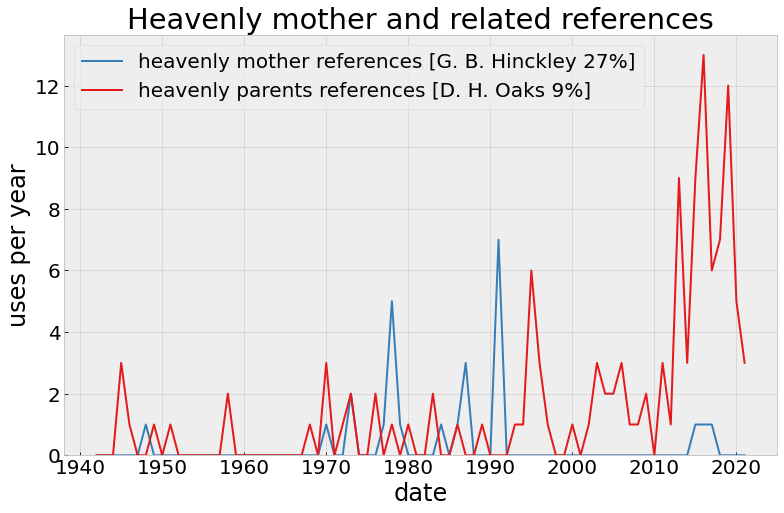

In [6]:
searchdata = {'search': [{'label': key, 'include': val} for key, val in terms_agg.items()],
              'top_user': 'true'}
search_result = text_search(talk_data, searchdata, norm='date',
                            group='date', quiet=True)

result_year = search_result.groupby(search_result.index.year).sum()
_ = result_year.plot(ylabel='uses per year',
                     title='Heavenly mother and related references',
                     ylim=[0, None])

Most of the references to heavenly mother alone fit roughly between 1970 and 1990, while most of the collective references to heavenly parents come post 1990. The other notable features is that there has been a significant rise in references to heavenly parents since about 2013. The number of all references in those 9 years of general conference is nearly equal to the references in the preceding 70 years, and is actually greater if we only consider the heavenly parents references.

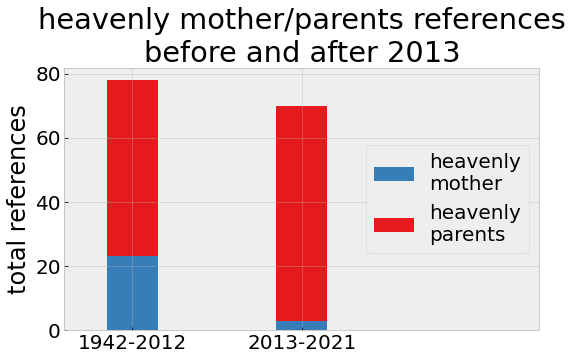

In [7]:
post_2013_stats = search_result.groupby(search_result.index>'2013-01-1').sum()
post_2013_stats.columns = ['heavenly\nmother', 'heavenly\nparents']
post_2013_stats.index = ['1942-2012', '2013-2021']

ax = post_2013_stats.plot.bar(
    figsize=[8,5],
    width=0.3,
    stacked=True, rot=0,
    title='heavenly mother/parents references\nbefore and after 2013',
    ylabel='total references')
ax.set_xlim([-0.4, 2.4])
_ = pl.legend(loc='center right')

Of the 67 references to heavenly parents occuring in the 2013-2021 time period, the top contributors are shown in the table below:

In [8]:
search_string_all = '(heavenly mother|mother in heaven|eternal feminine|a mother there|' + \
                    'heavenly parents|heavenly father and mother)'
top_since_2013 = top_users(talk_data, search_string_all, after=2013)[:4]
top_since_2013.columns = ['references', 'fraction of total']
top_since_2013.index.name = 'speaker'
top_since_2013.style.format({'fraction of total': '{:.1%}'.format})

,references,fraction of total
speaker,,
Dieter F. Uchtdorf,7,10.0%
M. Russell Ballard,7,10.0%
Carole M. Stephens,6,8.6%
Dallin H. Oaks,6,8.6%


There does not appear to be any single talk that is responsible for more than one or two references, so this new surge in references to "heavenly parents" since 2013 appears not to be a coincidence, but a conscious effort by some speakers to include this in their talks on a regular basis. The fact that there were a total of 5 references in April and another 4 in October of 2013 after only 1 in all of 2012 has the appearance of some kind of coordinated effort. That coordinated effort could also plausibly include eventual release of a [Gospel Topics essay on the subject of heavenly mother](https://www.churchofjesuschrist.org/study/manual/gospel-topics-essays/mother-in-heaven?lang=eng) in 2015, and an update of the [Young Women's theme](https://www.churchofjesuschrist.org/study/manual/young-women-theme/young-women-theme?lang=eng) to refer to "heavenly parents" in 2019.

There are two other noteworthy things that occurred at the time of the April general conference in 2013:
 - a woman gave one of the prayers in a general conference session for the first time, and
 - the Ordain Women organization held its first public meeting.

The start of Ordain Women on this same weekend is relevant, but because general conference talks and prayer assignments would have already happened well ahead of time, I don't think we can point to it as causal of the particular phenomenon of increased talk of heavenly parents. Rather, the things going on inside and outside the church organization in 2013 can both be thought of as products of work done during the years before that, which would include intellectual groundwork done by Mormon feminists during the preceding two decades, and a very active feminist Mormon blogging scene in the immediate years before then, among other things. We don't know what conversations were going on among church leadership in 2012 and 2013, but the evidence suggests that:
 - some kind of conversation was actively going on about how to address the concerns of women in the church,
 - part of that conversation included discussion about the doctrine of heavenly mother and whether or how to make it more central in our discourse, and
 - a conscious decision was made to speak of heavenly parents collectively rather than heavenly mother specifically.

In [9]:
# Setup show/hide source code box
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="show/hide source code"></form>''')